### 数据分析报告撰写

1. Take away in 5 minutes
2. Never make your boss think
3. Think complex, speak simple
4. One point in one page

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyecharts.charts import Bar
from pyecharts import options as opt
from datetime import datetime

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
%config InlineBackend.figure_format = 'svg'

### 商业模式

1. B2B：商家对商家（企业卖家对企业买家），交易双方都是企业，最典型的案例就是阿里巴巴，汇聚了各行业的供应商，特点是订单量一般较大。
2. B2C：商家对个人（企业卖家对个人买家），例如：唯品会，聚美优品。
3. B2B2C：商家对商家对个人，例如：天猫、京东。
4. C2C：个人（卖家）对个人（买家），例如：淘宝、人人车。
5. O2O：线上（售卖）到线下（提货），将线下的商务机会与互联网结合，让互联网成为线下交易的平台，让消费者在享受线上优惠价格的同时，又可享受线下贴心的服务，例如：美团、苏宁易购、大众点评。
6. C2B：个人对商家（个人买家对企业卖家），先有消费者提出需求，后有商家按需求组织生产，例如：尚品宅配。
7. 其他：ABC（代理-商家-消费者）、F2C（工厂-个人）、B2G（政府采购）、BoB（供应商-运营者-采购商）、SoLoMo（社交-本地化-移动端）……。



1. 复购率和回购率

    - 复购率：复购（某段时间有2次及以上购买行为）用户的占比。复购率能反映用户的忠诚度，监测周期一般较长。
    - 回购率：回购率一般监测周期较短，可以反映如短期促销活动对用户的吸引力。

2. 用户交易常用指标

    - 访问次数（PV）：一定时间内某个页面的浏览次数。
    - 访问人数（UV）：一定时间内访问某个页面的人数。
    - 加购数：将某款商品加入到购物车的用户数。
    - 收藏数：收藏某款商品的用户数。
    - GMV（总交易额、成交总额）：Gross Merchandise Volume，通常称之为“交易流水”。
    - 客单价（ARPU）：“$ 总收入 / 总用户数 $”，某些平台也用ARPPU表示客单价。
    - 转化率：“$ 付费用户数 / 访客数 $”。
    - 折扣率：“$ 销售额 / 吊牌总额 $”，其中吊牌总额为：“$ 吊牌价 \times 销量 $”。
    - 拒退量：拒收和退货的总数量。
    - 拒退额：拒收和退货的总金额。
    - 实际销售额：“$ 销售额 - 拒退额 $”。

3. 商品管理常用指标

    - SPU数：Standard Product Unit，商品的基本信息。
    - SKU数：Standard Keeping Unit，商品的库存信息。
    - 售卖比：“$ GMV / 备货值 $”，了解商品流转情况，可以用于库存优化。
    - 动销率：“$ 有销量的SKU数 / 在售SKU数 $”。

df=pd.read_excel(r'C:/Users/tian/Desktop/数据data/某电商网站订单数据.xlsx',index_col='id')
df.info()


1. RFM模型

RFM模型是使用得较为广泛的客户关系管理分析模式。RFM模型是衡量客户价值和客户创利能力的重要工具和手段，通过一个客户的近期购买行为、购买的频率以及花钱的多少三项指标来描述该客户的价值状况。

在RFM模式中，R（Recency）表示客户最近一次购买的时间有多远，F（Frequency）表示客户在最近一段时间内购买的次数，M（Monetary）表示客户在最近一段时间内购买的金额。RFM模型强调以客户的行为来区分客户。利用RFM分析，我们可以做以下几件事情：

1. 建立会员金字塔，区分各个级别的会员，如高级会员、中级会员、低级会员，然后针对不同级别的会员施行不同的营销策略，制定不同的营销活动。
2. 发现流失及休眠会员，通过对流失及休眠会员的及时发现，采取营销活动，激活这些会员。
3. 在短信、EDM（Email Direct Marketing）促销中，可以利用模型，选取最优会员。
4. 维系老客户，提高会员的忠诚度。

在使用RFM模型时，可以给三个变量不同的权重或按一定的规则进行分组，然后组合三个变量，分出不同级别的会员。


In [3]:
df = pd.read_excel(r'C:/Users/tian/Desktop/数据data/电商网站订单数据.xlsx', index_col='id')

In [4]:
# 修改有问题的列名
df.rename(columns={'chanelID':'channelID','platfromType':'platformType'},inplace=True)


In [6]:
# 提取2019年数据
df[pd.to_datetime(df['orderTime']).dt.year==2019]

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否
...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,We c hatMP,2019-12-31 23:32:55,2019-12-31 23:33:06,否
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,APP,2019-12-31 23:33:05,2019-12-31 23:34:36,是
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,WE B,2019-12-31 23:37:30,2019-12-31 23:37:44,否


In [7]:
# 2 筛选数据
df.query('payment>0',inplace=True)
df.query('orderAmount>0',inplace=True)
df.query('(payTime - orderTime).dt.seconds > 0 and (payTime - orderTime).dt.seconds < 1800',inplace=True)
df


,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否
...,...,...,...,...,...,...,...,...,...,...
104553,sys-2020-268392025,user-182189,PR000082,186.37,126.21,渠道-0568,Wech atMP,2020-01-01 23:30:57,2020-01-01 23:31:09,否
104554,sys-2020-213140521,user-170057,PR000603,138.81,138.81,渠道-0007,APP,2020-01-01 23:31:26,2020-01-01 23:31:36,否
104555,sys-2020-274536228,user-156592,PR000405,2632.27,2632.27,渠道-0985,Wech atMP,2020-01-01 23:46:56,2020-01-01 23:47:06,否


In [8]:
#3众数填充空值

df['channelID'].fillna(df['channelID'].mode()[0],inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 103317 entries, 6 to 104557
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       103317 non-null  object        
 1   userID        103317 non-null  object        
 2   goodsID       103317 non-null  object        
 3   orderAmount   103317 non-null  float64       
 4   payment       103317 non-null  float64       
 5   channelID     103317 non-null  object        
 6   platformType  103317 non-null  object        
 7   orderTime     103317 non-null  datetime64[ns]
 8   payTime       103317 non-null  datetime64[ns]
 9   chargeback    103317 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 8.7+ MB


In [9]:
# 去掉多余的空格
df['platformType'].apply(lambda x: x.replace(' ',''))
df['platformType']=df['platformType'].apply(lambda x: x.replace(' ',''))
df.head()

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,WechatMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,WechatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,WechatMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,ALiMP,2019-01-01 01:31:00,2019-01-01 01:31:36,否


In [10]:
# 添加折扣字段
a=df['orderAmount']
b=df['payment']
df['折扣']=np.round((a-b)/a,3)

In [11]:
temp2=df[df['payment']<=df['orderAmount']]
svg=temp2['折扣'].mean()
svg

0.07974685106214956

In [12]:
list1=df[df['payment']>df['orderAmount']].reset_index('id')['id']
list1

0           16
1           46
2           66
3           69
4          148
         ...  
2008    104455
2009    104463
2010    104500
2011    104513
2012    104514
Name: id, Length: 2013, dtype: int64

In [13]:
df['折扣']=np.round((a-b)/a,3)
df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,折扣
id,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,WechatMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否,0.000
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,WechatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否,0.032
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,WechatMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否,0.038
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否,0.047
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,ALiMP,2019-01-01 01:31:00,2019-01-01 01:31:36,否,0.000
...,...,...,...,...,...,...,...,...,...,...,...
104553,sys-2020-268392025,user-182189,PR000082,186.37,126.21,渠道-0568,WechatMP,2020-01-01 23:30:57,2020-01-01 23:31:09,否,0.323
104554,sys-2020-213140521,user-170057,PR000603,138.81,138.81,渠道-0007,APP,2020-01-01 23:31:26,2020-01-01 23:31:36,否,0.000
104555,sys-2020-274536228,user-156592,PR000405,2632.27,2632.27,渠道-0985,WechatMP,2020-01-01 23:46:56,2020-01-01 23:47:06,否,0.000


In [18]:
temp=df[df['payment']>=0]
temp

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,折扣
id,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,WechatMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否,0.000
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,WechatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否,0.032
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,WechatMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否,0.038
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否,0.047
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,ALiMP,2019-01-01 01:31:00,2019-01-01 01:31:36,否,0.000
...,...,...,...,...,...,...,...,...,...,...,...
104553,sys-2020-268392025,user-182189,PR000082,186.37,126.21,渠道-0568,WechatMP,2020-01-01 23:30:57,2020-01-01 23:31:09,否,0.323
104554,sys-2020-213140521,user-170057,PR000603,138.81,138.81,渠道-0007,APP,2020-01-01 23:31:26,2020-01-01 23:31:36,否,0.000
104555,sys-2020-274536228,user-156592,PR000405,2632.27,2632.27,渠道-0985,WechatMP,2020-01-01 23:46:56,2020-01-01 23:47:06,否,0.000


In [19]:
#数据筛选
temp = temp.query('payment > 0 or orderAmount > 0')
temp = temp.query('(payTime - orderTime).dt.seconds > 0 and (payTime - orderTime).dt.seconds < 1800')
temp

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,折扣
id,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,WechatMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否,0.000
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,WechatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否,0.032
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,WechatMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否,0.038
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否,0.047
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,ALiMP,2019-01-01 01:31:00,2019-01-01 01:31:36,否,0.000
...,...,...,...,...,...,...,...,...,...,...,...
104553,sys-2020-268392025,user-182189,PR000082,186.37,126.21,渠道-0568,WechatMP,2020-01-01 23:30:57,2020-01-01 23:31:09,否,0.323
104554,sys-2020-213140521,user-170057,PR000603,138.81,138.81,渠道-0007,APP,2020-01-01 23:31:26,2020-01-01 23:31:36,否,0.000
104555,sys-2020-274536228,user-156592,PR000405,2632.27,2632.27,渠道-0985,WechatMP,2020-01-01 23:46:56,2020-01-01 23:47:06,否,0.000


In [20]:
df[df['payment']<0]

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,折扣
id,,,,,,,,,,,


In [21]:
gmv=df.orderAmount.sum()
sales=df.payment.sum()
real=df[df.chargeback=='否'].payment.sum()
print(f'GMV:{gmv/10000:.2f}万元')
print(f'总销售额:{sales/10000:.2f}万元')
print(f'实际销售额:{real/10000:.2f}万元')

GMV:10857.02万元
总销售额:12101.75万元
实际销售额:10508.49万元


In [22]:
back_rate=df[df.chargeback=='是'].orderID.count()/df.orderID.count()
arppu=real/df.userID.nunique()
print(f'退货率:{back_rate*100:.2f}%')
print(f'客单价:{arppu:.2f}元')

退货率:13.18%
客单价:1336.55元


Text(0.5, 1.0, '2019年GMV走势')

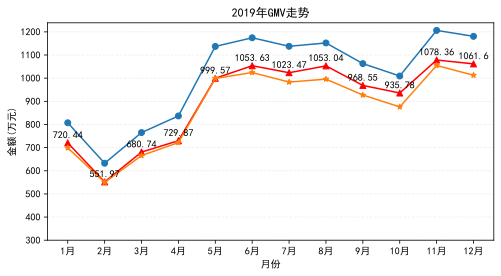

In [23]:
# 7 每月GMV及趋势分析(折线图)
df['month']=df.orderTime.dt.month
x=[f'{i}月' for i in range(1,13)]
gmv_ser=np.round(df.groupby('month').orderAmount.sum()/10000,2)
sales_ser=np.round(df.groupby('month').payment.sum()/10000,2)
real_ser=np.round(df[df.chargeback=='否'].groupby('month').payment.sum()/10000,2)
plt.figure(figsize=(8,4),dpi=120)
plt.plot(x,gmv_ser,marker='^',color='red')
plt.plot(x,sales_ser,marker='o')
plt.plot(x,real_ser,marker='*')
for i in range(1,13):
    plt.text(i-1,gmv_ser[i]+20,gmv_ser[i],ha='center')
plt.yticks(np.arange(300,1201,100))
plt.grid(axis='y',alpha=0.25,linestyle='--')
plt.xlabel('月份')
plt.ylabel('金额(万元)')
plt.title('2019年GMV走势')

In [24]:
import pyecharts.options as opts
from pyecharts.charts import Line

week_name_list = [f'{i}月' for i in range(1,13)]


(
    Line(init_opts=opts.InitOpts(width="1200px", height="600px"))
    .add_xaxis(xaxis_data=week_name_list)
    .add_yaxis(
        series_name="GMV",
        y_axis=gmv_ser,
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="最大值"),
                opts.MarkPointItem(type_="min", name="最小值"),
            ]
        ),
        markline_opts=opts.MarkLineOpts(
            data=[opts.MarkLineItem(type_="average", name="平均值")]
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="2019年GMV走势", subtitle=""),
        tooltip_opts=opts.TooltipOpts(trigger="axis"),
        toolbox_opts=opts.ToolboxOpts(is_show=True),
        xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    )
    .render_notebook()
)

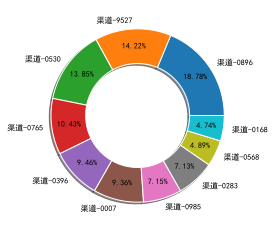

In [25]:
#8 按流量渠道拆解GMV占比
gmv_ser1=df.groupby(df['channelID']).orderAmount.sum().nlargest(10)
gmv_ser1.plot(kind='pie',autopct='%.2f%%',pctdistance=0.8,
                          wedgeprops={
                              'width':0.4,
                              'edgecolor':'white'
                          },
                          textprops={
                              'fontsize':8
                          },shadow=True)
plt.ylabel('')
plt.show()

In [26]:
gmv_ser1=gmv_ser1.reset_index()
gmv_ser1

,channelID,orderAmount
0,渠道-0896,17308537.96
1,渠道-9527,13103480.79
2,渠道-0530,12762080.46
3,渠道-0765,9614210.98
4,渠道-0396,8723049.34
5,渠道-0007,8625832.64
6,渠道-0985,6589875.67
7,渠道-0283,6569961.75
8,渠道-0568,4508492.51
9,渠道-0168,4371965.75


In [27]:
list_a=[]
for i in range(len(gmv_ser1)):
    list_a.append([gmv_ser1['channelID'][i],gmv_ser1['orderAmount'][i]])
list_a

[['渠道-0896', 17308537.96],
 ['渠道-9527', 13103480.79],
 ['渠道-0530', 12762080.46],
 ['渠道-0765', 9614210.98],
 ['渠道-0396', 8723049.34],
 ['渠道-0007', 8625832.64],
 ['渠道-0985', 6589875.67],
 ['渠道-0283', 6569961.75],
 ['渠道-0568', 4508492.51],
 ['渠道-0168', 4371965.75]]

In [28]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

c = (
    Pie()
    .add(
        "",
        list_a,
        radius=["40%", "75%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Pie-Radius"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .render("pie_radius.html")
)

In [29]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

gmv_ser = df.groupby('channelID').orderAmount.sum()
gmv_ser = gmv_ser.nlargest(10)
data = [
    [gmv_ser.index[i], np.round(gmv_ser.values[i] / 10000, 2)] 
    for i in range(gmv_ser.size)
]

pie_chart = Pie(init_opts=opts.InitOpts(width="600px", height="600px"))
pie_chart.add(
    "",
    data,
    radius="50%",
    center=["50%", "50%"],
)
pie_chart.set_global_opts(
    title_opts=opts.TitleOpts(title="GMV贡献Top10渠道"),
    legend_opts=opts.LegendOpts(type_="plain", pos_top="5%", orient="horizontal"),
)
pie_chart.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
pie_chart.render_notebook()


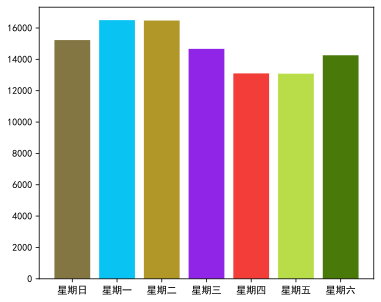

In [30]:
df['weekday']=(df.orderTime.dt.dayofweek+1)%7
tempk=pd.pivot_table(df,index='weekday',values='orderID',aggfunc='nunique')
x1=[f'星期{i}' for i in '日一二三四五六']
plt.figure(figsize=(6,5),dpi=120)
plt.bar(x1,tempk['orderID'],color=np.random.rand(7,3))
plt.show()


In [31]:
df['hour']=df.orderTime.dt.floor('30T').dt.time
temp3=pd.pivot_table(df,index='hour',values='orderID',aggfunc='nunique')
temp3

,orderID
hour,
00:00:00,1066
00:30:00,633
01:00:00,382
01:30:00,267
02:00:00,139
02:30:00,107
03:00:00,72
03:30:00,50
04:00:00,33


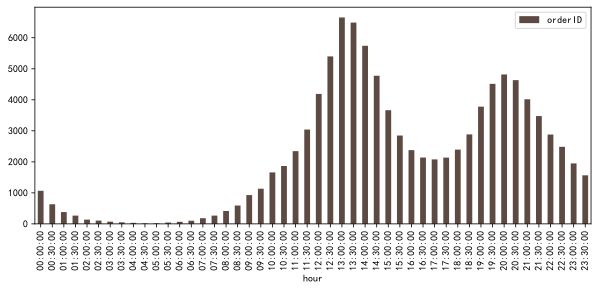

In [32]:
temp3.plot(figsize=(10,4),kind='bar',color=np.random.rand(6,3))
plt.show()

In [33]:
df=df[df.chargeback=='否']
df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,折扣,month,weekday,hour
id,,,,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,WechatMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否,0.000,1,2,00:00:00
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,WechatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否,0.032,1,2,00:00:00
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,WechatMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否,0.038,1,2,01:00:00
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否,0.047,1,2,01:00:00
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,ALiMP,2019-01-01 01:31:00,2019-01-01 01:31:36,否,0.000,1,2,01:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104553,sys-2020-268392025,user-182189,PR000082,186.37,126.21,渠道-0568,WechatMP,2020-01-01 23:30:57,2020-01-01 23:31:09,否,0.323,1,3,23:30:00
104554,sys-2020-213140521,user-170057,PR000603,138.81,138.81,渠道-0007,APP,2020-01-01 23:31:26,2020-01-01 23:31:36,否,0.000,1,3,23:30:00
104555,sys-2020-274536228,user-156592,PR000405,2632.27,2632.27,渠道-0985,WechatMP,2020-01-01 23:46:56,2020-01-01 23:47:06,否,0.000,1,3,23:30:00


In [34]:
temp=pd.pivot_table(df,index='userID',columns='month',values='orderID',aggfunc='nunique')
temp

month,1,2,3,4,5,6,7,8,9,10,11,12
userID,,,,,,,,,,,,
user-100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
user-100003,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
user-100007,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
user-299980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
user-299983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
user-299989,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [35]:
def handle_rebuy_data(x):
    if np.isnan(x):
        return x
    return 1 if x>1 else 0

temp=temp.applymap(handle_rebuy_data)
temp.sum()/temp.count()

month
1     0.014925
2     0.009192
3     0.015842
4     0.017410
5     0.026436
6     0.026348
7     0.020718
8     0.026816
9     0.021826
10    0.024898
11    0.026412
12    0.026198
dtype: float64

In [36]:
df['F']=1
temp = pd.pivot_table(
    df,
    index='userID',
    values=['orderTime', 'payment', 'F'],
    aggfunc={
        'orderTime': np.max,
        'payment': np.sum,
        'F': np.sum
    }
)
temp['R'] = (temp.orderTime - datetime(2019, 12, 31)).dt.days
temp['M'] = temp.payment
temp = temp[['R', 'F', 'M']]
temp

C:\Users\tian\AppData\Local\Temp/ipykernel_8932/4058831635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F']=1


,R,F,M
userID,,,
user-100000,-79,1,1770.81
user-100003,-221,1,511.59
user-100006,-47,1,443.55
user-100007,-351,1,2162.14
user-100008,-45,1,4879.94
...,...,...,...
user-299980,-74,1,389.44
user-299983,-4,1,706.80
user-299989,-50,2,1637.47


In [37]:
temp.mean()

R    -148.453091
F       1.271053
M    1489.024012
dtype: float64

In [38]:
temp=temp.apply(lambda x :x-x.mean())
temp = temp.applymap(lambda x: '1' if x >= 0 else '0')
temp

,R,F,M
userID,,,
user-100000,1,0,1
user-100003,0,0,0
user-100006,1,0,0
user-100007,0,0,1
user-100008,1,0,1
...,...,...,...
user-299980,1,0,0
user-299983,1,0,0
user-299989,1,1,1


In [39]:
def make_tag(model):
    tags = {
        '111': '重要价值客户',
        '101': '重要发展客户',
        '011': '重要保持客户',
        '001': '重要挽留客户',
        '110': '一般价值客户',
        '100': '一般发展客户',
        '010': '一般保持客户',
        '000': '一般挽留客户'
    }
    key = model['R'] + model['F'] + model['M']
    return tags.get(key)


temp['TAG'] = temp.apply(make_tag, axis=1)
temp

,R,F,M,TAG
userID,,,,
user-100000,1,0,1,重要发展客户
user-100003,0,0,0,一般挽留客户
user-100006,1,0,0,一般发展客户
user-100007,0,0,1,重要挽留客户
user-100008,1,0,1,重要发展客户
...,...,...,...,...
user-299980,1,0,0,一般发展客户
user-299983,1,0,0,一般发展客户
user-299989,1,1,1,重要价值客户


In [40]:
ser = temp.groupby('TAG').TAG.count()
ser

TAG
一般价值客户     4889
一般保持客户     1712
一般发展客户    20271
一般挽留客户    22751
重要价值客户     7046
重要保持客户     2326
重要发展客户     5211
重要挽留客户     6367
Name: TAG, dtype: int64

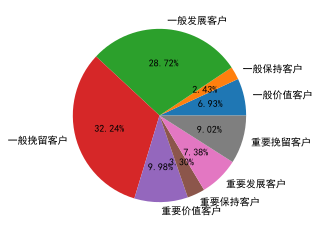

In [41]:
ser.plot(kind='pie',autopct='%.2f%%')
plt.ylabel('')
plt.show()